# Assignment 2 - Machine Learning Basics

## Derek Wales
Netid:  *XXX*

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
- Understand the bias-variance tradeoff and the impact of model flexibility algorithm performance and model selections

In [12]:
# MAC USERS TAKE NOTE:
# For clearer plots in Jupyter notebooks on macs, run the following line of code:
# %config InlineBackend.figure_format = 'retina'

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWERS**
1. More flexible, because this will allow the parameters of the model to be tuned effectively to fit the data. It also reduces the chance of overfitting.

2. Less flexible because we do not have enough observations to know the shape of the distribution and a more flexible model could lead to overfitting. 

3. More flexible because because it will allow the model to adjust to an unorthodox shape.

4. If there is high variance it is more likely that a flexible model will fit to the noise, therefore it is better to use a less flexible model.

## 2 
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWERS**

A. i) This is a regression problem because we are trying to model the effects of various parameters to predict a numerical value, as opposed to a specific outcome. ii) For this problem why are more interested in inference about CEO Salary over predicting a specific value. iii) Sample size is 500 (the top firms in the US) and the predictors are record profit, number of employees (n = 500/p = 3).

B. i) In this problem we are searching for a binary outcome it is much more suited for classification over regression. ii) Since the goal is to determine if a product will succeed or fail the main goal here is prediction. iii) For this problem n = 20 and the predictor variables are price charged for the product, marketing budget, competition price, and ten other variables (n = 20/p = 13).

C. i) This is a regression problem, because we are looking at a specific numerical change in the US Dollar value. ii) In this situation we're much more concerned with predicting the percentage of change then determining exactly WHY its happening. iii) For this problem n = every week in 2012 and the predictors are the chane in the British, US, and German markets (n = 52/p =3). 

# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

**ANSWERS**:

#### Part A: Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0.$ Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

In [13]:
import pandas as pd
import numpy as np
import math

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])
test_point = np.array([0, 0, 0])

i = 0
obs_list = [1,2,3,4,5,6]
dist_list = []

while i < 6:
    dist_list.append(np.linalg.norm(test_point-X[i,:]))
    i = i + 1

result_df = pd.DataFrame({'X Cord Set':obs_list, 'Distance':dist_list})
result_df

,X Cord Set,Distance
0,1,3.000000
1,2,2.000000
2,3,3.162278
3,4,2.236068
4,5,1.414214
5,6,1.732051


### Part B: What is our prediction with $K=1$? 
Blue, because that is the closest neighbor.

### Part C: What is our prediction with $K=3$? 
Red, because the two of the three closest neighbors are red.

### Part D: If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why? 
Small because it will allow the model to be more flexible and fit more accurately to the nonlinear data.

## 4 
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

#### Varun Prasad, MIDS 21 explained to me how to develop the KNN algorith "from scratch" and assited me in troubleshooting it. After which I was able to use it for subsequent problems.

**ANSWERS**:

In [14]:
from scipy import stats

# (a) Write your own kNN classifier
class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        pass
    
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.x = x
        self.y = y 
        pass
    
    def predict(self, x_test, k):
        y_hat = [] # Variable to store the estimated class label for 
        for row in x_test:
            dist = np.sqrt(np.sum((row-self.x)**2, axis =1 ))
            
            dist_ind = np.argsort(dist)[0:k]
            
            y_ind = self.y[dist_ind]
            
            class_mode = stats.mode(y_ind)
            
            y_hat.append(class_mode[0].tolist())
                
        # Return the estimated targets
        y_hat = [result for classes in y_hat for result in classes] # Classes
        return y_hat
    
# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
    nvalues = len(y)
    accuracy = sum(y == y_hat) / nvalues
    return accuracy

### Part B: Loading the required data.

In [15]:
# Loading low dimensional test/train
df_x_train_low = pd.read_csv('_data\\A2_X_train_low.csv', header = None).to_numpy() 
df_y_train_low = pd.read_csv('_data\\A2_y_train_low.csv', header = None).to_numpy()
df_x_test_low = pd.read_csv('_data\\A2_X_test_low.csv', header = None).to_numpy()
df_y_test_low = pd.read_csv('_data\\A2_y_test_low.csv', header = None).to_numpy()

# Loading high dimensional test/train
df_x_train_high = pd.read_csv('_data\\A2_X_train_high.csv', header = None).to_numpy()
df_y_train_high = pd.read_csv('_data\\A2_y_train_high.csv', header = None).to_numpy()
df_x_test_high = pd.read_csv('_data\\A2_X_test_high.csv', header = None).to_numpy()
df_y_test_high = pd.read_csv('_data\\A2_y_test_high.csv', header = None).to_numpy()

### Part C: Fitting with K = 5 on the low and high dimensional data and calculating the time

In [16]:
# Fitting on the low dataset
import time
t0 = time.time()

knn_low = Knn()
knn_low.fit(df_x_train_low, df_y_train_low)

# Predicting and getting accuracy
knn_low_predictions = knn_low.predict(df_x_test_low, 5) 
low_accuracy = accuracy(df_y_test_low, knn_low_predictions)

print("The accuracy score is:", low_accuracy[0], "taking {:.3f}s to run".format(time.time()-t0))

The accuracy score is: 0.925 taking 0.165s to run


In [17]:
# Fitting on the high dataset
t1 = time.time()

knn_high = Knn()
knn_high.fit(df_x_train_high, df_y_train_high)

# Predicting and getting accuracy
knn_high_predictions = knn_high.predict(df_x_test_high, 5) 
high_accuracy = accuracy(df_y_test_high, knn_high_predictions)

print("The accuracy score is:", high_accuracy[0], "taking {:.3f}s to run".format(time.time()-t1))

The accuracy score is: 0.993 taking 0.305s to run


### Part D: Comparing the results with Sklearn 

In [18]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import time

t0 = time.time()

sk_learn_knn_low = KNeighborsClassifier(5)
sk_learn_knn_low.fit(df_x_train_low, df_y_train_low)

y_low_predicted = sk_learn_knn_low.predict(df_x_test_low)
low_accuracy_score = accuracy_score(df_y_test_low, y_low_predicted)

print("The accuracy score for the Sklearn Model is:", low_accuracy_score, "taking {:.3f}s to run".format(time.time()-t0))

The accuracy score for the Sklearn Model is: 0.925 taking 0.024s to run


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  # Remove the CWD from sys.path while we load stuff.


In [19]:
t1 = time.time()

sk_learn_knn_high = KNeighborsClassifier(5)
sk_learn_knn_high.fit(df_x_train_high, df_y_train_high)

y_high_predicted = sk_learn_knn_high.predict(df_x_test_high)
high_accuracy_score = accuracy_score(df_y_test_high, y_high_predicted)

print("The accuracy score for the Sklearn Model is:", high_accuracy_score, "taking {:.3f}s to run".format(time.time()-t1))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


The accuracy score for the Sklearn Model is: 0.993 taking 0.205s to run


### Part D: Answer

Although, the accuracy of both my model and the sklearn package were the same, sklearn ran much faster. Completing the low and high dimensional datasets  7 and 3.5x faster respectively.

### Part E: What are some of the drawbacks of the prediction process being slow.
A slow prediction process can make the the model difficult to use in real time for something like Netflix recommendations, etc. 

## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

#### Sources: https://stackabuse.com/k-nearest-neighbors-algorithm-in-python-and-scikit-learn/
#### https://scikit-learn.org/stable/auto_examples/ensemble/plot_voting_decision_regions.html

**ANSWERS**

### Part A/B: Synthetic Dataset/Plot

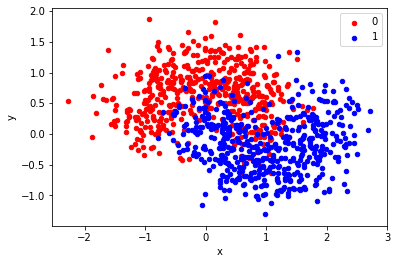

In [20]:
# **(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`]
# (http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) 
# module with the parameter `noise=0.35` to generate 1000 random samples.
from sklearn.datasets import make_moons
from matplotlib import pyplot
import pandas as pd

X, y = make_moons(n_samples=1000, noise=0.35)

# Part B) Create a scatterplot
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = pyplot.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
pyplot.show()

### Part C: Creating 3 Different Data Subsets and Knn Combinations

In [21]:
# Part C Creating three random samples
df_1 = df.sample(n = 100) # Sample One
df_2 = df.sample(n = 100) # Sample Two
df_3 = df.sample(n = 100) # Sample Three

### Part D: For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

In [22]:
# Fit three k-Nearest Neighbor classifiers with: k = {1, 25, 50\}. 
# This will result in 9 combinations (3 datasets, with 3 trained classifiers).
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

def knn_function (df_files):
    plt.figure(figsize = (10,10))
    
    for i,n in enumerate([1, 25, 50]):
        for j,df in enumerate(df_files):
            n_neighbors = n
            
            # Preparing Data
            X = df.iloc[:,0:2].values
            y = df.iloc[:, 2].values
            h = .08 
        
            # Create color maps
            #cmap_light = ListedColormap(['red', 'cyan']) # ,'#00AAFF' '#AAFFAA'
            #cmap_bold = ListedColormap(['white', 'black']) # ,'#00AAFF'  '#FF0000', '#00FF00'
            cmap_light = ListedColormap(["#FFAAAA", "#AAAAFF"])
            cmap_bold = ListedColormap(["#FF0000", "#0000FF"])
        
            # we create an instance of Neighbours Classifier and fit the data.
            clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
            clf.fit(X, y)
        
            # calculate min, max and limits
            x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
            y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
            xx, yy = np.meshgrid(np.arange(x_min, x_max, h), 
            np.arange(y_min, y_max, h)) 
        
            # predict class using data and kNN classifier
            Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        
            # Put the result into a color plot
            Z = Z.reshape(xx.shape)
            sbplt = 3 * j + i + 1
            plt.subplot(3, 3, sbplt)
            plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
        
            # Plot also the training points
            plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, s=10)
            plt.xlim(xx.min(), xx.max())
            plt.ylim(yy.min(), yy.max())
            #fig.canvas.set_title('Window Title')
            #plt.legend()
            plt.title("(k = %i)" % (n_neighbors))
            #plt.show()

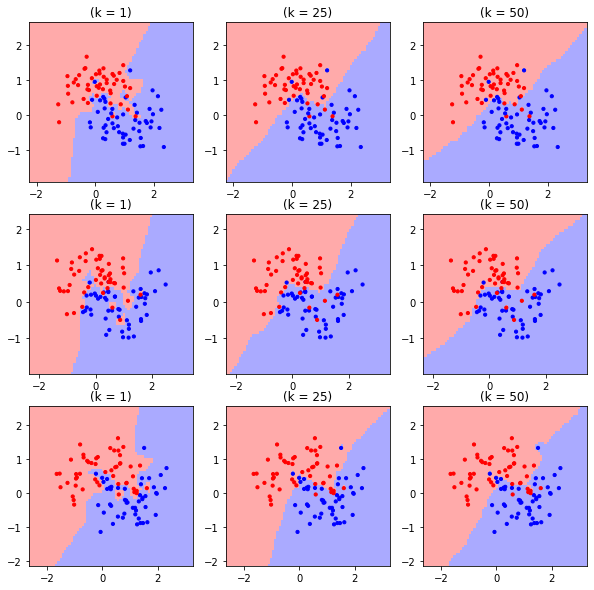

In [23]:
df_files = [df_1, df_2, df_3]
knn_function(df_files)

### Part E: What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?
The rows demonstrate the difference in flexibility between the models. On the left, the
highly flexible models overfit to the data, so the decision boundaries vary wildly across the rows
(the different datasets). On the right, the less flexible models see less variation in the decision
boundaries across the rows. The value here of k = 25 appears to do the best at separating the two
classes that may generalize

### Part F: Explain the bias-variance tradeoff using the example of the plots you made in this exercise.
The bias-variance tradeoff reflects the challenge of choosing how much flexibility the model
should have before it’s fit to the training data. Allowing too much results in overfitting (left column),
the model begins to become less sensitive to changes in the samples as the flexibility decreases,
but then begins to underfit the data as the value of k gets too high, which can be seen in
the consistently high predictions errors of the right columns. The ideal is to carefully choose a
level of flexibility that is not too high, but also is not too low so as to underfit the data.
Note: there are not many data points in this exercise, and we’re only looking at the performance on the
training (in-sample) data not the test (out-of-sample) data. The test data is where we legitimately evaluate
generalization performance.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWERS**

### Part A: Creating Test Set and Using Previous Dataset as Training. 

In [24]:
X1, y1 = make_moons(n_samples=1000, noise=0.35)

### Part B: Train a kNN classifier on the training set (X, y) for k = 1,2,...500. Apply these to both training and test datasets and plot the classification error.
#### Source: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score

In [25]:
from sklearn.metrics import accuracy_score
# Creating the Accuracy List 
accuracy_list_test = []
accuracy_list_train = []
k = range(1,501)
for k_val in k:
    n = k_val

    classifier = KNeighborsClassifier(n_neighbors=n)
    classifier.fit(X, y) # Fitting on Training
    
    y_pred_train = classifier.predict(X) # Predicting on Train
    accuracy_list_train.append(accuracy_score(y, y_pred_train))
    
    y_pred_test = classifier.predict(X1) # Predicting on Test
    accuracy_list_test.append(accuracy_score(y1, y_pred_test))

In [26]:
# Creating the Error List
error_rate_train = list(map(lambda x: 1-x, accuracy_list_train))
error_rate_test = list(map(lambda x: 1-x, accuracy_list_test))

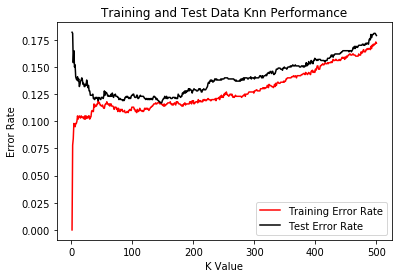

In [27]:
plt.plot(k, error_rate_train, label = 'Training Error Rate', color = "red")
plt.plot(k, error_rate_test, label = 'Test Error Rate', color = "black")
plt.legend()
plt.xlabel('K Value')
plt.ylabel('Error Rate')
plt.title('Training and Test Data Knn Performance')  
plt.show()

### Part C: What trend do you see in the results? 
Initially the training error is zero percent as k is close to one. As k increases the bias increases resulting in a lower error percentance on the test data until it reaches a certain threshold.

### Part D: What values of k represent high bias and which represent high variance?
The lower value of k the higher the variance, as k increases the bias goes up.

### Part E: What is the optimal value of k and why?
K = 44, because it has the highest accuracy score on the test data (work below)

In [28]:
# Finding the max k value of the list Question E
max_value = max(accuracy_list_test)
max_index = accuracy_list_test.index(max_value)
print(max_index) 

145


### Part F: In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

Linear and Logistic Regression can add higher order terms that act as "tuning knobs" to increase the flexibility of the model.

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWERS**

##### Source: https://towardsdatascience.com/a-beginners-guide-to-linear-regression-in-python-with-scikit-learn-83a8f7ae2b4f

In [29]:
# Reading in the Data 
df_q7_train = pd.read_csv("_data\\A2_Q7_train.csv")
df_q7_test = pd.read_csv("_data\\A2_Q7_test.csv")

#Sorting the data
df_q7_train = df_q7_train.sort_values('x')
df_q7_test = df_q7_test.sort_values('x')

#### Part A: Creating a Scatter Plot of the Training Data

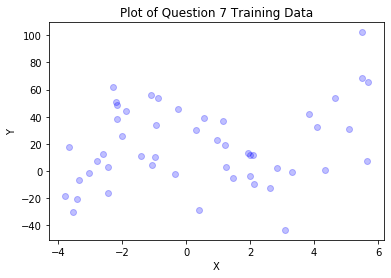

In [30]:
plt.scatter(df_q7_train['x'],df_q7_train['y'], facecolor='b', alpha=0.25)
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Question 7 Training Data')
plt.show()

#### Part B: Estimate a Linear Regression Model on the Training Data and Compare the fit to the Training Data

In [31]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures

# Reshaping the data
x_train = np.array(df_q7_train['x']).reshape(-1, 1)
y_train = np.array(df_q7_train['y']).reshape(-1, 1)

regressor = LinearRegression()  
regressor.fit(x_train, y_train) # Training the algorithm

regressor1 = regressor.intercept_
coef1 = regressor.coef_
y_pred = regressor.predict(x_train)

print("The model has an intercept of {:.3f} and a slope of {}".format(regressor1[0], str(coef1).lstrip('[').rstrip(']')))
print("The mean squared error is: {:.3f}".format(metrics.mean_squared_error(y_train, y_pred)))
print("The R^2 value is: {:.3f}".format(metrics.r2_score(y_train, y_pred)))

The model has an intercept of 17.205 and a slope of 2.59072826
The mean squared error is: 791.417
The R^2 value is: 0.065


#### Estimated model from the training data
$y = 17.20 + 2.59x, MSE: 791.42, R^2 = 0.065$

#### Part C: Reshaping to improve the model

In [32]:
# New x Function
# Link = https://stackoverflow.com/questions/31406975/polynomial-regression-using-python
poly = PolynomialFeatures(degree=3)
x_train_2 =poly.fit_transform(x_train)

# Fitting the model
regressor_2 = LinearRegression()  
regressor_2.fit(x_train_2, y_train) # Fitting with a polynomial.

# Model Results
regressor_2 = LinearRegression()  
regressor_2.fit(x_train_2, y_train) # Training the algorithm
y_pred_2 = regressor_2.predict(x_train_2)
intercept2 = regressor_2.intercept_

print("The model has an intercept of {:.3f}".format(intercept2[0]))
print("The model coefficients are {}".format(str(regressor_2.coef_).lstrip('[').rstrip(']')))
print("The mean squared error is : {:.2f}".format(metrics.mean_squared_error(y_train, y_pred_2)))
print("The R^2 value is : {:.3}".format(metrics.r2_score(y_train, y_pred_2)))

The model has an intercept of 24.155
The model coefficients are  0.         -9.25191526 -2.12568583  0.89700921
The mean squared error is : 510.88
The R^2 value is : 0.396


#### Estimated model from the training data 
$y = 24.16 - 9.25x - 2.13x^2 + 0.90x^3, MSE: 510.88, R^2 = 0.40$

Using a cubic function I was able to fit the a much better model. Improving my MSE from 791.41 to 510.88 and my $R^2$ from 0.064 to 0.396. 

#### Part D: Plotting Both Models on the Training Data

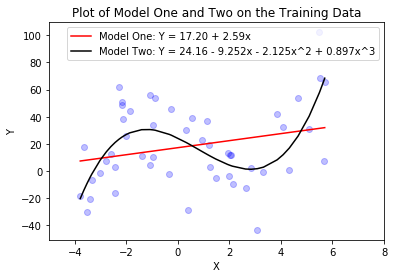

In [33]:
plt.scatter(df_q7_train['x'],df_q7_train['y'], facecolor='b', alpha=0.25)
plt.plot(x_train, y_pred, label = 'Model One: Y = 17.20 + 2.59x', color = "red")
plt.plot(x_train, y_pred_2, label = 'Model Two: Y = 24.16 - 9.252x - 2.125x^2 + 0.897x^3', color = "black")
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Plot of Model One and Two on the Training Data')
plt.xlim((-5, 8))  
plt.show()

#### Part E: Applying the models to the test data.

In [34]:
x_test = np.array(df_q7_test['x']).reshape(-1, 1)
y_test = np.array(df_q7_test['y']).reshape(-1, 1)

# Model 1
print("The R^2 value is: {:.3}".format(metrics.r2_score(y_test, y_pred[0:20])))

# Model 2
print("The R^2 value is: {:.3}".format(metrics.r2_score(y_test, y_pred_2[0:20])))

The R^2 value is: -0.171
The R^2 value is: -0.485


#### Part F: Which models perform better on the training data, and which on the test data? Why?
The transformed model (third order polynomial) functioned better than the simple linear regression
approach because there was a nonlinear relationship between the target/response and
feature/predictor variables. This relationship appeared visibly third order, and the coefficients
a0, a1, a2, and a3 were large contributors to the model. In both the training and test data, the
transformed features performed better than the single feature in both R2 and MSE, where the test
performance increased the most. However, the test dataset is small, so we should exercise caution
in overstating the generalizability of the model.

#### Part G: Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?
It’s important that the training data be representative of the model. Without representative
examples, the predictions are likely to be inaccurate. Therefore, if the test data were significantly
different from the training dataset, we would expect the predictive capability of the model to be
lower.
Now, one challenge here is what kind of difference is present. Perhaps there were more samples
for lower x values in the training dataset than in the test dataset. Another challenge could be
that the data were fundamentally different. Perhaps x values of 1 in the training data correspond
to y values of 0.5 in the training data, but of something significantly higher, for example 37, in
the test data. In this case, the model will learn from the examples seen. In either of these two
scenarios, the model will struggle to make predictions on the test data that is not representative of
the training data.